# Series

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
revenues=pd.Series([555,7000,1880])
revenues

0     555
1    7000
2    1880
dtype: int64

In [3]:
revenues.index

RangeIndex(start=0, stop=3, step=1)

In [4]:
city_revenues = pd.Series([555,7000,1980], index=['Amsterdam','Tokyo','Beijing'])
city_revenues

Amsterdam     555
Tokyo        7000
Beijing      1980
dtype: int64

In [5]:
city_employee_count = pd.Series({'Amsterdam':5,'Tokyo':8})

In [6]:
city_data = pd.DataFrame({'revenue':city_revenues,'employee_count':city_employee_count})
city_data

,revenue,employee_count
Amsterdam,555,5.0
Beijing,1980,NaN
Tokyo,7000,8.0


In [7]:
city_data.columns

Index(['revenue', 'employee_count'], dtype='object')

In [8]:
city_data.index

Index(['Amsterdam', 'Beijing', 'Tokyo'], dtype='object')

# Concat & Merge

In [9]:
further_city_data = pd.DataFrame({'revenue':[7000,3400], 'employee_count':[2,2]},index=['New York','Barcelona'])
further_city_data

,revenue,employee_count
New York,7000,2
Barcelona,3400,2


In [10]:
city_data

,revenue,employee_count
Amsterdam,555,5.0
Beijing,1980,NaN
Tokyo,7000,8.0


# Concat Vertikal

In [11]:
all_city_data = pd.concat([city_data,further_city_data])
all_city_data

,revenue,employee_count
Amsterdam,555,5.0
Beijing,1980,NaN
Tokyo,7000,8.0
New York,7000,2.0
Barcelona,3400,2.0


# Concat Horizontal 

In [12]:
city_countries = pd.DataFrame({'country':['Holland', 'Japan', 'Holland', 'Canada','Spain'],
                                         'capital':[1,1,0,0,0]},
                                index=['Amsterdam','Tokyo','Rotterdam','Toronto','Barcelona'])
city_countries

,country,capital
Amsterdam,Holland,1
Tokyo,Japan,1
Rotterdam,Holland,0
Toronto,Canada,0
Barcelona,Spain,0


In [13]:
cities = pd.concat([all_city_data, city_countries],axis=1)
cities

,revenue,employee_count,country,capital
Amsterdam,555.0,5.0,Holland,1.0
Beijing,1980.0,NaN,NaN,NaN
Tokyo,7000.0,8.0,Japan,1.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0
Toronto,NaN,NaN,Canada,0.0


In [14]:
pd.concat([all_city_data,city_countries],axis=1,join='inner')
# Join inner hanya menampilkan data yang ada pada concat

,revenue,employee_count,country,capital
Amsterdam,555,5.0,Holland,1
Tokyo,7000,8.0,Japan,1
Barcelona,3400,2.0,Spain,0


# Merge

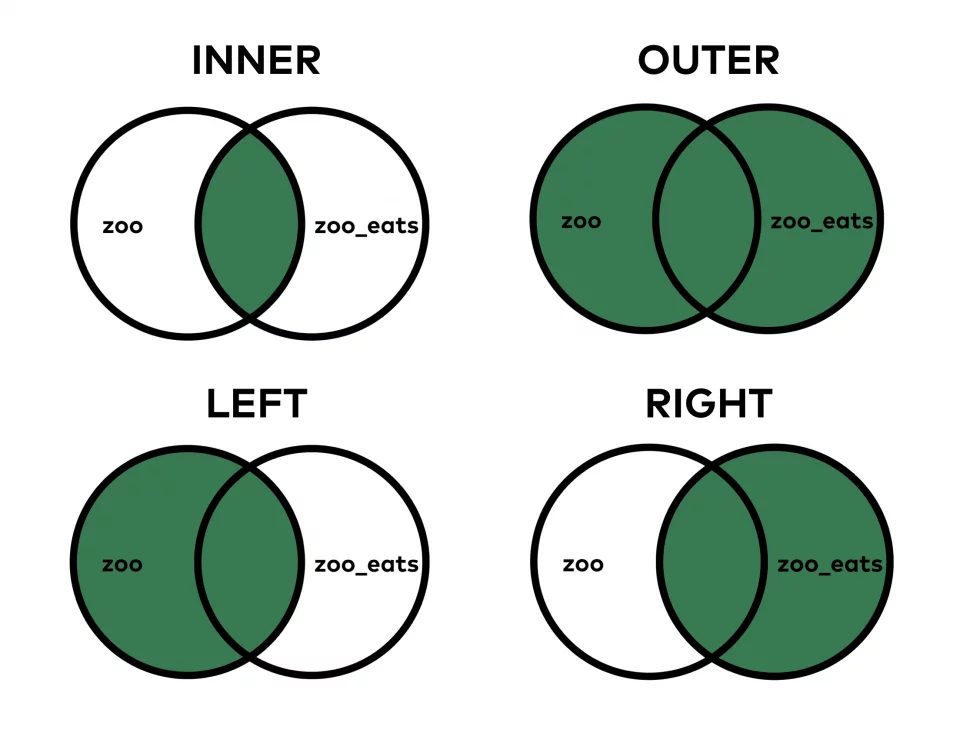

In [15]:
countries = pd.DataFrame({'population_mil':[17,127,37],
                         'continent':['Europe','Asia','North America']}, index=['Holland','Japan','Canada'])
countries

,population_mil,continent
Holland,17,Europe
Japan,127,Asia
Canada,37,North America


In [16]:
countries2 = pd.DataFrame({'population_mil':[17,127,37],
                         'continent':['Europe','Asia','North America'], 
                          'country':['Holland','Japan','Canada']})
countries2

,population_mil,continent,country
0,17,Europe,Holland
1,127,Asia,Japan
2,37,North America,Canada


In [17]:
cities

,revenue,employee_count,country,capital
Amsterdam,555.0,5.0,Holland,1.0
Beijing,1980.0,NaN,NaN,NaN
Tokyo,7000.0,8.0,Japan,1.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0
Toronto,NaN,NaN,Canada,0.0


inner

In [18]:
cities.merge(countries2,on='country',how='inner')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17,Europe
1,NaN,NaN,Holland,0.0,17,Europe
2,7000.0,8.0,Japan,1.0,127,Asia
3,NaN,NaN,Canada,0.0,37,North America


left

In [19]:
cities.merge(countries2,on='country',how='left')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17.0,Europe
1,1980.0,NaN,NaN,NaN,NaN,NaN
2,7000.0,8.0,Japan,1.0,127.0,Asia
3,7000.0,2.0,NaN,NaN,NaN,NaN
4,3400.0,2.0,Spain,0.0,NaN,NaN
5,NaN,NaN,Holland,0.0,17.0,Europe
6,NaN,NaN,Canada,0.0,37.0,North America


right

In [20]:
cities.merge(countries2,on='country',how='right')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17,Europe
1,NaN,NaN,Holland,0.0,17,Europe
2,7000.0,8.0,Japan,1.0,127,Asia
3,NaN,NaN,Canada,0.0,37,North America


outer

In [21]:
cities.merge(countries2,on='country',how='outer')

,revenue,employee_count,country,capital,population_mil,continent
0,555.0,5.0,Holland,1.0,17.0,Europe
1,NaN,NaN,Holland,0.0,17.0,Europe
2,1980.0,NaN,NaN,NaN,NaN,NaN
3,7000.0,2.0,NaN,NaN,NaN,NaN
4,7000.0,8.0,Japan,1.0,127.0,Asia
5,3400.0,2.0,Spain,0.0,NaN,NaN
6,NaN,NaN,Canada,0.0,37.0,North America


# Exploratory Data Analysis with Pandas

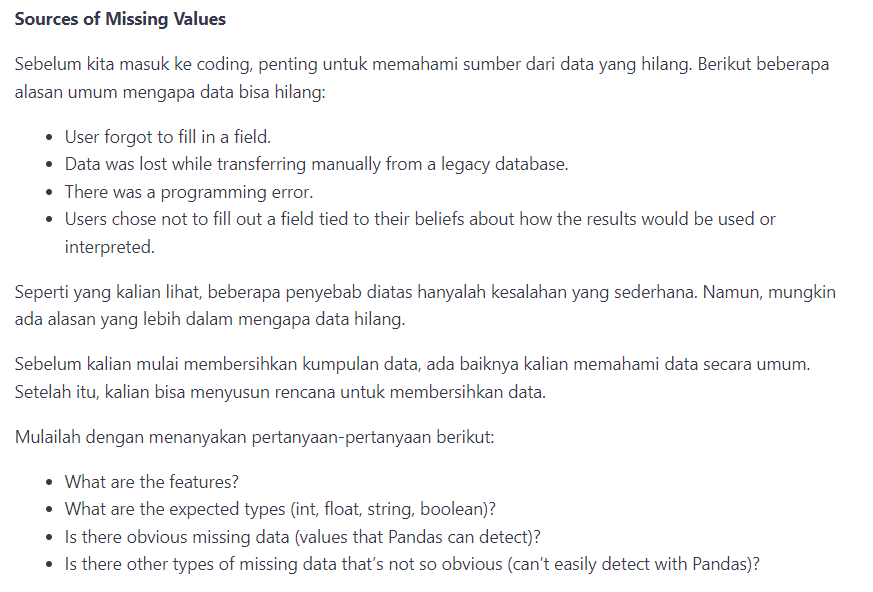

In [22]:
import pandas as pd 
import numpy as np

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [24]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


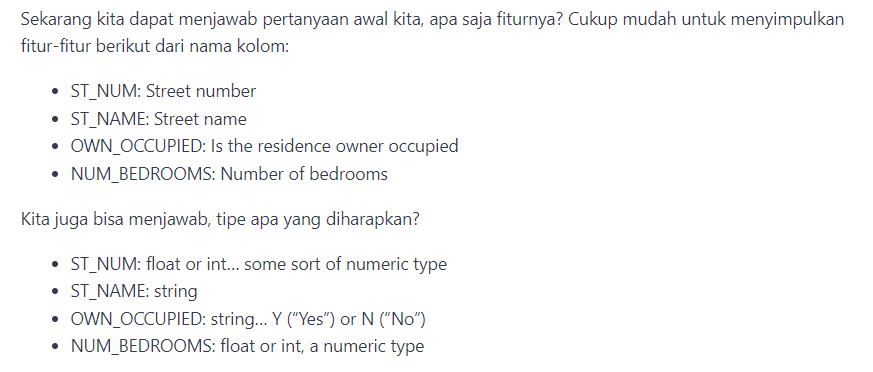

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [26]:
df.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [27]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [28]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [29]:
df['ST_NUM'].fillna(0)

0    104.0
1    197.0
2      0.0
3    201.0
4    203.0
5    207.0
6      0.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [30]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [31]:
df['NUM_BEDROOMS'].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [32]:
missing_values = ['n/a','na','--']

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values = missing_values)

In [34]:
df.NUM_BEDROOMS

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [35]:
df.NUM_BEDROOMS.isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

In [36]:
a = 0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[a, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    a+=1

In [37]:
cnt = 0 #cnt sebagai representasi dari index
for row in df['NUM_BATH']:
    try:
        float(row) #konversi data pada kolom own_occupied menjadi int, kalau error (saat konversi selain angka) maka akan masuk ke error
        pass
    except ValueError:
        df.loc[cnt, 'NUM_BATH'] = np.nan
    cnt += 1

df['NUM_BATH'].fillna(int(df['NUM_BATH'].median()), inplace = True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,1,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,1,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [38]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [39]:
# Mengecek null di masing-masing kolom
df.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        0
SQ_FT           2
dtype: int64

In [40]:
# Mengecek jumlah null keseluruhan
df.isna().sum().sum()

11

In [41]:
# Mengecek benar atau tidak ada null dalam kolom
df.isna().values.any()

True

In [42]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,1,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,1,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [43]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [44]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [45]:
df.NUM_BEDROOMS

0    3.0
1    3.0
2    3.0
3    1.0
4    3.0
5    3.0
6    2.0
7    3.0
8    3.0
Name: NUM_BEDROOMS, dtype: float64

In [46]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,1,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,1,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [47]:
mean = df['SQ_FT'].mean()
df['SQ_FT'].fillna(mean, inplace=True)

In [48]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0
2,100003000.0,NaN,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,1,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,1,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,1100.0
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [49]:
df['SQ_FT'].fillna(df['SQ_FT'].mean(),inplace = True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0
2,100003000.0,NaN,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,1,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,1,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,1100.0
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [50]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')
data

In [51]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [52]:
data_a = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [53]:
data_a

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [54]:
data_a.rename(columns={u'Unnamed: 0' : u'Year'}, inplace=True)

In [55]:
data_a.head()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [56]:
data_a.dropna(inplace=True)

In [57]:
data_a.head()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


In [58]:
data_a.set_index('Year', inplace=True)

In [59]:
data_a.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


<AxesSubplot:xlabel='Year'>

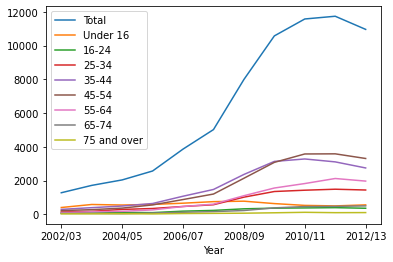

In [60]:
data_a.plot()

<AxesSubplot:xlabel='Year'>

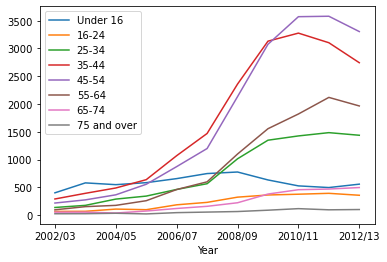

In [61]:
data_age_minus_total = data_a.drop('Total', axis=1)
data_age_minus_total.plot()

<AxesSubplot:xlabel='Year'>

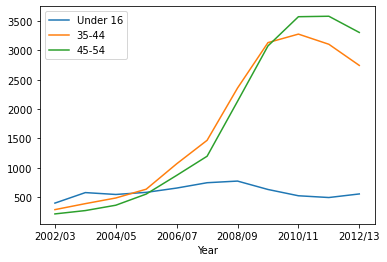

In [62]:
data_a['Under 16'].plot(label='Under 16', legend=True)
data_a['35-44'].plot(label='35-44', legend=True)
data_a['45-54'].plot(label='45-54', legend=True)

Bisa disimpulkan bahwa umur 45-54 merupakan range umur yang paling rawan obesitas dan terjadi kenaikan angka obesitas pertahunnya.

# Date Time/Time Series

In [103]:
from datetime import datetime

In [104]:
date_range = pd.date_range(start='1/01/2020', end='1/08/2020',freq='H')

In [105]:
date_range

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [106]:
df = pd.DataFrame(date_range, columns=['date'])

In [107]:
df

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [108]:
len(date_range)

169

In [109]:
df['data']=np.random.randint(0,100,size=(len(date_range)))

In [110]:
df.head()

,date,data
0,2020-01-01 00:00:00,13
1,2020-01-01 01:00:00,53
2,2020-01-01 02:00:00,81
3,2020-01-01 03:00:00,6
4,2020-01-01 04:00:00,62


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    169 non-null    datetime64[ns]
 1   data    169 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.1 KB


In [112]:
df

,date,data
0,2020-01-01 00:00:00,13
1,2020-01-01 01:00:00,53
2,2020-01-01 02:00:00,81
3,2020-01-01 03:00:00,6
4,2020-01-01 04:00:00,62
...,...,...
164,2020-01-07 20:00:00,16
165,2020-01-07 21:00:00,48
166,2020-01-07 22:00:00,0
167,2020-01-07 23:00:00,11


In [126]:
df.set_index('date',inplace=True)

In [127]:
string_date_range_2 = ['June-01-2020','June-02-2020','June-03-2020']
# Print([x +' ' fo x in string_date_range_2]) # List Comprehensif
timestamp_date_range_2 = [datetime.strptime(x, '%B-%d-%Y') for x in string_date_range_2]
timestamp_date_range_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [128]:
datetime.strptime('Jun-01-20','%b-%d-%y')

datetime.datetime(2020, 6, 1, 0, 0)

In [129]:
df2 = pd.DataFrame(timestamp_date_range_2, columns=['date'])
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [130]:
list_a = [1,2,3,4,5]
list_comp = [x**2 for x in list_a]
list_comp

[1, 4, 9, 16, 25]

In [131]:
df.loc['2020-01-01':'2020-01-03']

,data
date,
2020-01-01 00:00:00,13
2020-01-01 01:00:00,53
2020-01-01 02:00:00,81
2020-01-01 03:00:00,6
2020-01-01 04:00:00,62
...,...
2020-01-03 19:00:00,63
2020-01-03 20:00:00,39
2020-01-03 21:00:00,1


In [133]:
df.loc['2020-01-05'].mean()

data    42.791667
dtype: float64

In [134]:
df.resample('D').mean()

,data
date,
2020-01-01,50.416667
2020-01-02,51.458333
2020-01-03,45.041667
2020-01-04,58.500000
2020-01-05,42.791667
2020-01-06,52.541667
2020-01-07,42.291667
2020-01-08,99.000000


In [135]:
df.resample('Y').mean()

,data
date,
2020-12-31,49.301775


## Rolling

In [136]:
df

,data
date,
2020-01-01 00:00:00,13
2020-01-01 01:00:00,53
2020-01-01 02:00:00,81
2020-01-01 03:00:00,6
2020-01-01 04:00:00,62
...,...
2020-01-07 20:00:00,16
2020-01-07 21:00:00,48
2020-01-07 22:00:00,0


In [138]:
df['rolling']=df.rolling(3).sum()

C:\Users\muham\AppData\Local\Temp\ipykernel_8468\617867296.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['rolling'], dtype='object')
  df['rolling']=df.rolling(3).sum()


In [139]:
df

,data,rolling
date,,
2020-01-01 00:00:00,13,NaN
2020-01-01 01:00:00,53,NaN
2020-01-01 02:00:00,81,147.0
2020-01-01 03:00:00,6,140.0
2020-01-01 04:00:00,62,149.0
...,...,...
2020-01-07 20:00:00,16,90.0
2020-01-07 21:00:00,48,102.0
2020-01-07 22:00:00,0,64.0


# Time Series to Dataset

In [141]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col=0, parse_dates=True)
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [143]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [144]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   Year         4383 non-null   int64  
 5   Month        4383 non-null   int64  
 6   Weekday      4383 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 403.0 KB


In [145]:
opsd_daily.loc['2017-08-10':'2017-08-15']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2017-08-10,1351.491,100.274,71.160,171.434,2017,8,3
2017-08-11,1329.039,108.577,42.198,150.775,2017,8,4
2017-08-12,1121.458,305.908,80.906,386.814,2017,8,5
2017-08-13,1025.070,101.266,141.157,242.423,2017,8,6
2017-08-14,1305.341,136.416,201.027,337.443,2017,8,0
2017-08-15,1333.398,182.064,172.205,354.269,2017,8,1


In [146]:
opsd_daily.loc['2012-01']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,2012,1,6
2012-01-02,1269.581,207.327,6.574,213.901,2012,1,0
2012-01-03,1334.745,473.468,24.679,498.147,2012,1,1
2012-01-04,1347.136,499.804,14.681,514.485,2012,1,2
2012-01-05,1376.658,523.851,5.071,528.922,2012,1,3
2012-01-06,1291.215,286.265,13.160,299.425,2012,1,4
2012-01-07,1175.688,368.288,4.115,372.403,2012,1,5
2012-01-08,1103.383,220.851,8.440,229.291,2012,1,6
2012-01-09,1443.371,151.837,5.264,157.101,2012,1,0


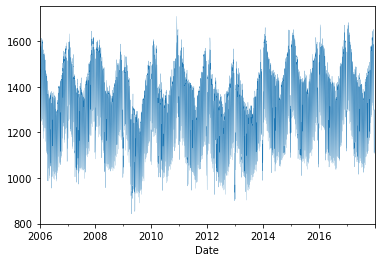

In [147]:
opsd_daily['Consumption'].plot(linewidth=0.2);

<AxesSubplot:xlabel='Date'>

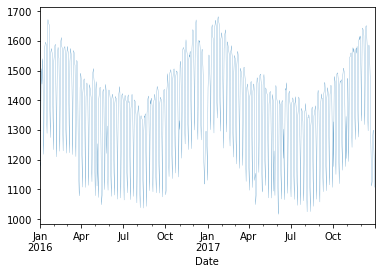

In [148]:
opsd_daily.loc['2016':'2017']['Consumption'].plot(linewidth=0.2)

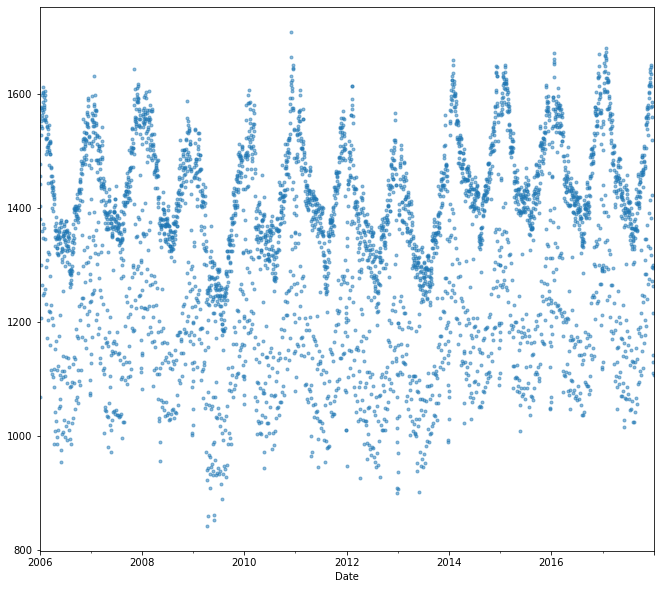

In [149]:
opsd_daily['Consumption'].plot(marker='.', alpha=0.5,
linestyle='None', figsize=(11,10));

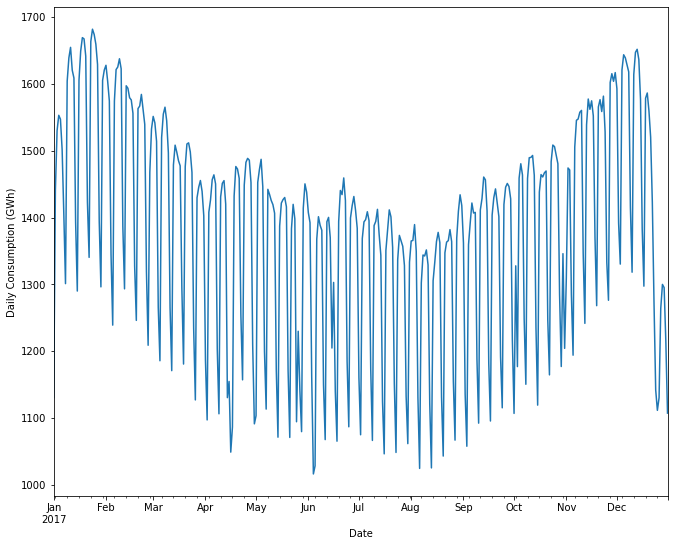

In [150]:
ab = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11,9))
ab.set_ylabel('Daily Consumption (GWh)');

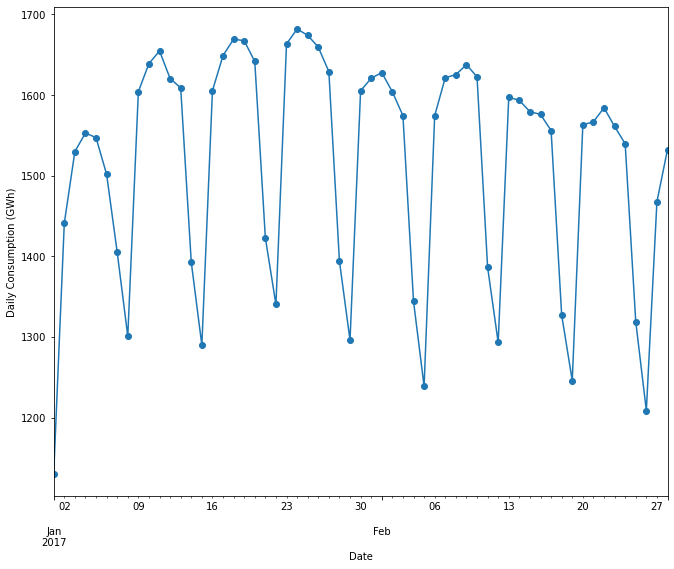

In [151]:
ab = opsd_daily.loc['2017-01':'2017-02',
'Consumption'].plot(marker='o', linestyle ='-', figsize=(11,9))
ab.set_ylabel('Daily Consumption (GWh)');

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

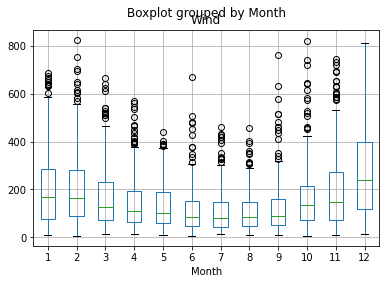

In [152]:
opsd_daily.boxplot(column=['Wind'], by='Month')

In [153]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [154]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


<AxesSubplot:xlabel='Date'>

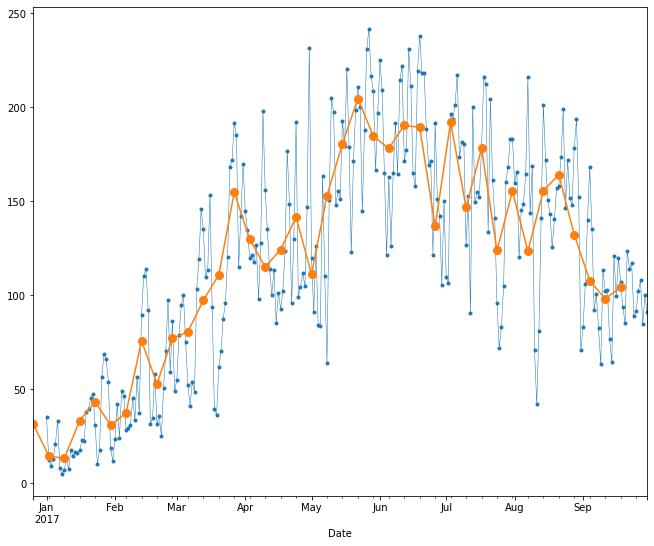

In [155]:
start, end = '2017-01', '2017-09'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-',
linewidth=0.5, figsize=(11,9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o',
markersize=8, linestyle='-', figsize=(11, 9))

In [158]:
df_property = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')
df_property

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


## QUIZ 2 

Dengan menggunakan for loop dan try except ubah 'HURLEY' pada NUM_BATH menjadi NaN lalu replace value NaN pada NUM_BATH menjadi median dari data NUMBATH

In [162]:
cnt = 0 #cnt sebagai representasi dari index
for row in df_property['NUM_BATH']:
    try:
        float(row) #konversi data pada kolom own_occupied menjadi int, kalau error (saat konversi selain angka) maka akan masuk ke error
        pass
    except ValueError:
        df_property.loc[cnt, 'NUM_BATH'] = np.nan
    cnt += 1

df_property['NUM_BATH'].fillna(int(df_property['NUM_BATH'].median()), inplace = True)
df_property

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,1,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,1,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800
